<a id="top"></a>
<div style="text-align: center; background: #1ED760; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 0 50% 0 / 40px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">Lab 03</br></br> <I style = "font-size: 20px">by: Ahmed Sharaf</I></div>



## Practical Work 3

For this practical work, the trainees will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

##### Please notice that we will apply these algorithm to single variable LR.
##### Only batch variant is required.

#### Import numpy, matplotlib.pyplot and make it inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.metrics import r2_score
from sklearn.utils import shuffle

%matplotlib inline
np.random.seed(101)

# Visualization Functions

In [3]:
def loss_vs_epochs(losses):
    plt.plot(losses, '-o', color='red')
    plt.title("Loss vs Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.show()


def thetas_vs_loss(thetas_zero, thetas_one, losses, lr):
    fig, ax = plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle("Thetas vs Losses")

    ax[0].plot(thetas_zero, losses, '-o')
    ax[0].set_title(f'Theta Zero vs Loss (lr={lr})')
    ax[0].set_xlabel('Theta Zero')
    ax[0].set_ylabel('Loss')
    ax[0].grid(True)

    ax[1].plot(thetas_one, losses, '-o')
    ax[1].set_title(f'Theta One vs Loss (lr={lr})')
    ax[1].set_xlabel('Theta One')
    ax[1].set_ylabel('Loss')
    ax[1].grid(True)

    plt.tight_layout()
    plt.show()

def all_lines(X, y, thetas_zero, thetas_one):
    plt.scatter(X, y, label='Data')

    for i in range(len(thetas_zero)):
        y_hat = thetas_zero[i] + thetas_one[i] * X
        plt.plot(X, y_hat, color='red', alpha=0.3)

    plt.title('Regression Lines at Different Stages')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.grid(True)
    plt.show()


def best_line(X, y, y_pred):
    plt.scatter(X, y, label="Data Points")
    plt.plot(X, y_pred, color='red', linewidth=2, label="Best Fit Line")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title("Best Fit Line")
    plt.legend()
    plt.grid(True)
    plt.show()


def vis(X, y, y_pred, thetas_zero, thetas_one, losses, lr):
    loss_vs_epochs(losses)
    thetas_vs_loss(thetas_zero, thetas_one, losses, lr)
    all_lines(X, y, thetas_zero, thetas_one)
    best_line(X, y, y_pred)


To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [4]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [5]:
a=-1
b=2
y=a*X+b
y

array([  2.        ,   1.59183673,   1.18367347,   0.7755102 ,
         0.36734694,  -0.04081633,  -0.44897959,  -0.85714286,
        -1.26530612,  -1.67346939,  -2.08163265,  -2.48979592,
        -2.89795918,  -3.30612245,  -3.71428571,  -4.12244898,
        -4.53061224,  -4.93877551,  -5.34693878,  -5.75510204,
        -6.16326531,  -6.57142857,  -6.97959184,  -7.3877551 ,
        -7.79591837,  -8.20408163,  -8.6122449 ,  -9.02040816,
        -9.42857143,  -9.83673469, -10.24489796, -10.65306122,
       -11.06122449, -11.46938776, -11.87755102, -12.28571429,
       -12.69387755, -13.10204082, -13.51020408, -13.91836735,
       -14.32653061, -14.73469388, -15.14285714, -15.55102041,
       -15.95918367, -16.36734694, -16.7755102 , -17.18367347,
       -17.59183673, -18.        ])

### Plot X vs. y

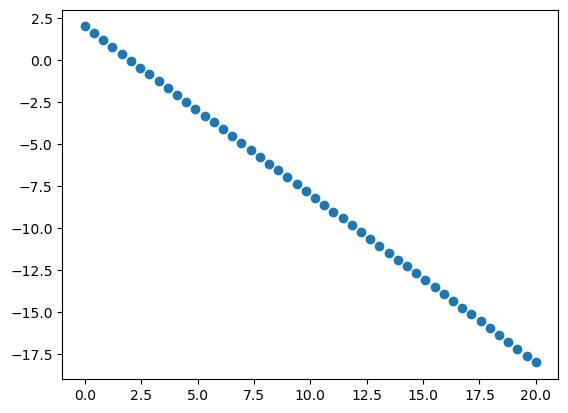

In [6]:
plt.scatter(X, y)
plt.show()


#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Choose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)

In [7]:
def BGD(X, lr = 0.001, itteration = 1000):
    m = len(X)
    cost = []
    all_theta_zero = []
    all_theta_one = []
    theta_zero, theta_one = 0, 0
    
    for i in range(itteration):
        print("="*10, f"Iteration {i+1}", '='*10)
        all_theta_zero.append(theta_zero)
        all_theta_one.append(theta_one)
        
        y_pred = theta_zero + theta_one * X
        print(f"h(x) = \n{y_pred}")
        error_vector = y_pred - y
        print(f"error = \n{error_vector}")
        J = np.sum(error_vector ** 2) / (2 * m)
        print(f"Cost = {J}")
        cost.append(J)
        
        grad_theta_zero = np.sum(error_vector) / m
        grad_theta_one = np.sum(error_vector * X) / m
        
        grad_norm = np.linalg.norm(np.array([grad_theta_zero, grad_theta_one]))
        print(f"Gradient Norm = {grad_norm}")
        if grad_norm < 0.001:
            print(f"Convergence After {i+1} iteration")
            break
        
        theta_zero = theta_zero - lr * grad_theta_zero
        theta_one = theta_one - lr * grad_theta_one
        print(f"Theta Zero New = {theta_zero}")
        print(f"Theta One New = {theta_one}")
    return theta_zero, theta_one, all_theta_zero, all_theta_one, cost

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [8]:
t0, t1, ts0, ts1, j = BGD(X, 0.0005, 300)

========== Iteration 1 ==========
h(x) = 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
error = 
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]
Cost = 49.34693877551021
Gradient Norm = 114.97254258164628
Theta Zero New = -0.004
Theta One New = -0.05734693877551021
========== Iteration 2 ==========
h(x) = 
[-0.004      -0.0274069

In [9]:
y_pred = t0 + t1 * X
print(f"r2_score = {r2_score(y, y_pred)}")

r2_score = 0.9707406024215084


##### It is recommended to define a function for each plot. This will help you to easly plot the learning curves when you use different values of hyperparameters.

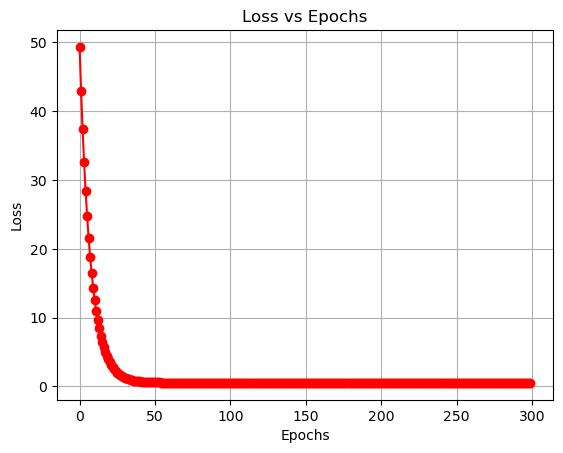

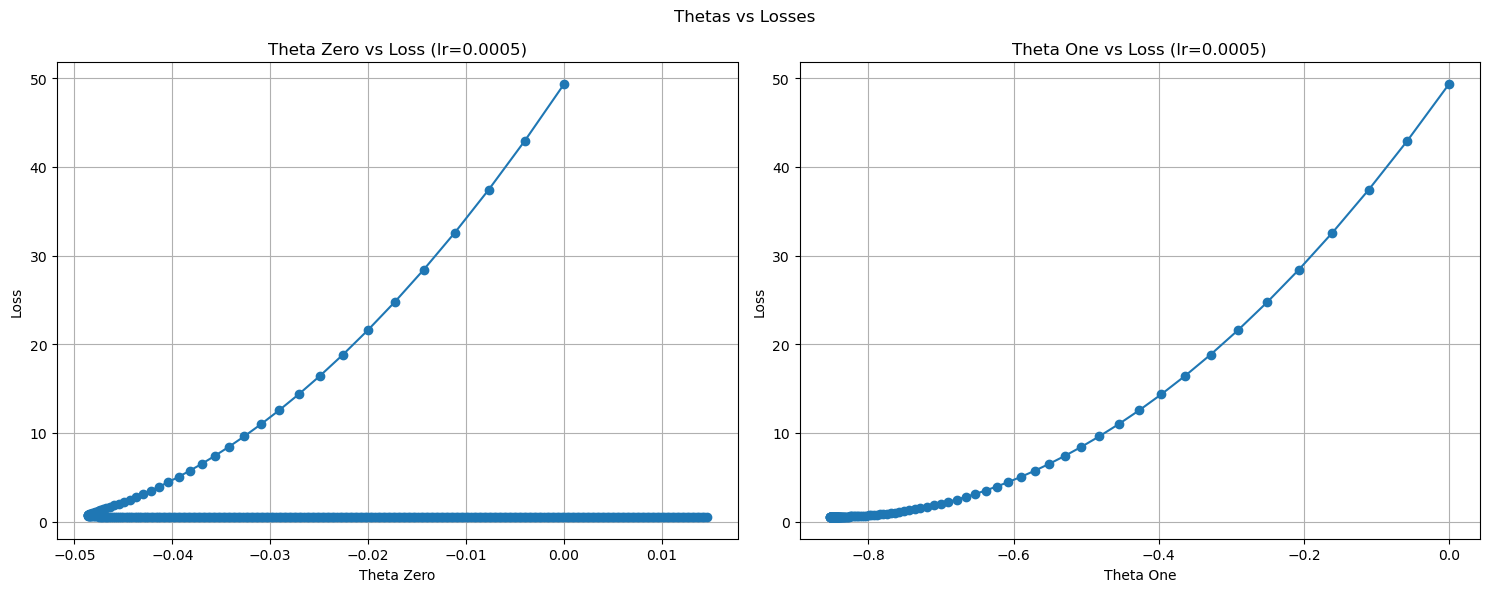

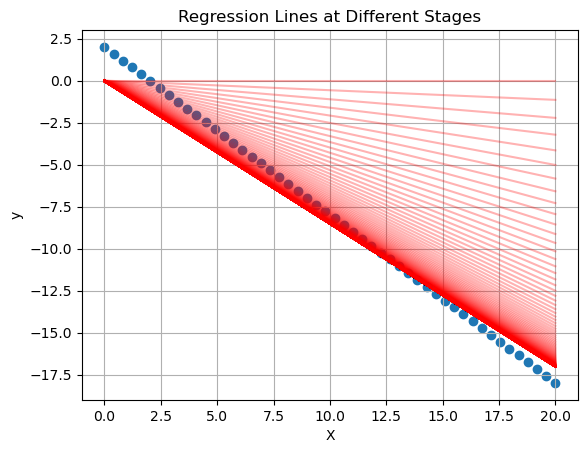

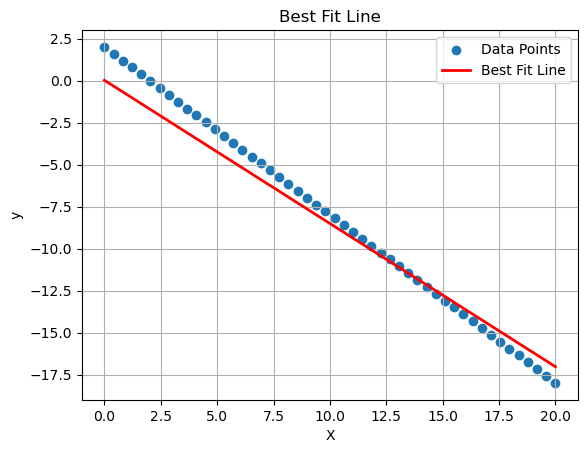

In [10]:
vis(X, y, y_pred, ts0, ts1, j, 0.0005)

### Update your Batch GD for single variable  implementation (Batch variant) to be Momentum-Based GD and check your results

#### γ takes values between 0 and 1.

In [11]:
def momentum_GD(X, y, lr = 0.01, gamma = 0.9, itteration = 1000):
    m = len(X)
    theta_0 = 0
    theta_1 = 0
    
    losses = []
    all_theta_0 = []
    all_theta_1 = []
    
    m_t_0 = 0
    m_t_1 = 0
    
    for i in range(itteration):
        print("="*10, f"Iteration {i+1}", '='*10)
        all_theta_0.append(theta_0)
        all_theta_1.append(theta_1)
        
        y_pred = theta_0 + theta_1 * X
        print(f"h(x) = \n{y_pred}")
        error_vector = y_pred - y
        print(f"error = \n{error_vector}")
        J = np.sum(error_vector ** 2) / (2 * m)
        losses.append(J)
        
        theta_0_grad = np.sum(error_vector) / m
        theta_1_grad = np.sum(error_vector * X) / m
        
        norm_grad = np.linalg.norm(np.array([theta_0_grad, theta_1_grad]))
        print(f"Gradient Norm = {norm_grad}")
        if norm_grad < 0.001:
            print(f"Convergence After {i+1} iteration")
            break

        m_t_0 = gamma * m_t_0 + lr * theta_0_grad
        m_t_1 = gamma * m_t_1 + lr * theta_1_grad
        
        theta_0 = theta_0 - m_t_0
        theta_1 = theta_1 - m_t_1
        print(f"Theta 0 New = {theta_0}")
        print(f"Theta 1 New = {theta_1}")
        
    return theta_0, theta_1, all_theta_0, all_theta_1, losses

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005, gamma=0.5 and max. iterations = 300.

In [12]:
t0, t1, ts0, ts1, j = momentum_GD(X, y, 0.0005, 0.5, 300)

========== Iteration 1 ==========
h(x) = 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
error = 
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]
Gradient Norm = 114.97254258164628
Theta 0 New = -0.004
Theta 1 New = -0.05734693877551021
========== Iteration 2 ==========
h(x) = 
[-0.004      -0.02740691 -0.05081383 -0.07422074 -0.0

In [13]:
y_pred = t0 + t1 * X
print(f"r2_score: {r2_score(y, y_pred)}")

r2_score: 0.972892479332971


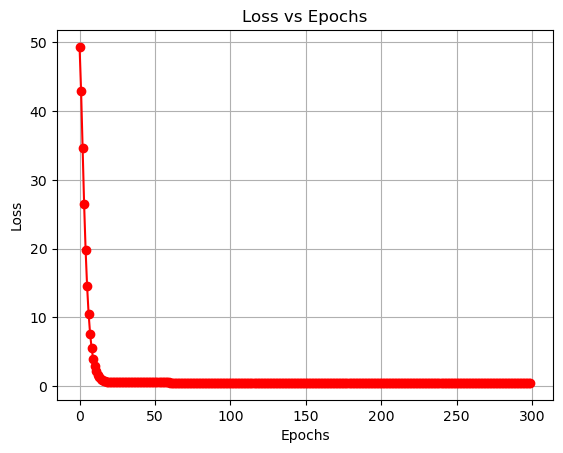

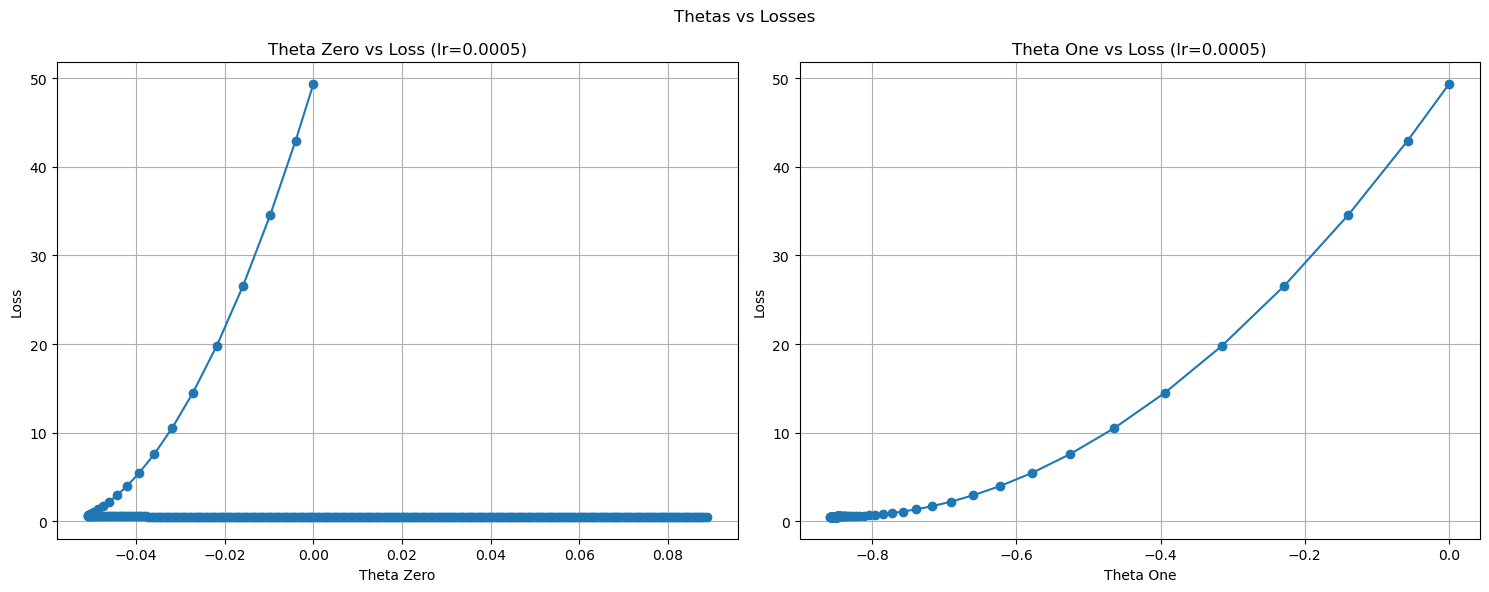

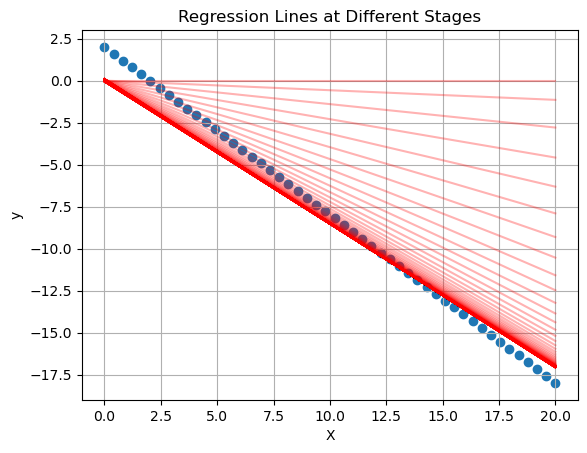

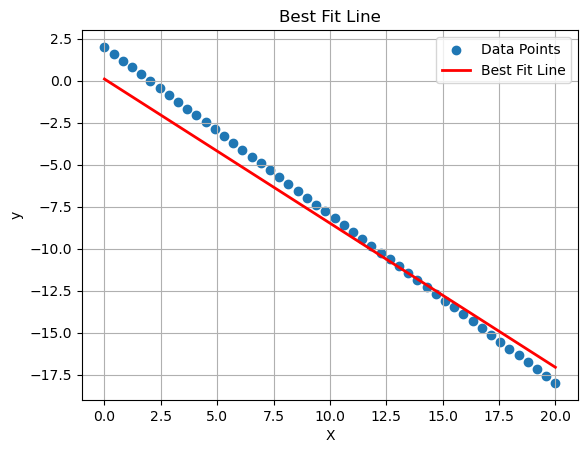

In [14]:
vis(X, y, y_pred, ts0, ts1, j, 0.0005)

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

##### The following results uses alpha = 0.0005, gamma=0.9 and max. iterations = 300.

In [15]:
t0, t1, ts0, ts1, j = momentum_GD(X, y, 0.0005, 0.9, 300)

========== Iteration 1 ==========
h(x) = 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
error = 
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]
Gradient Norm = 114.97254258164628
Theta 0 New = -0.004
Theta 1 New = -0.05734693877551021
========== Iteration 2 ==========
h(x) = 
[-0.004      -0.02740691 -0.05081383 -0.07422074 -0.0

In [16]:
y_pred = t0 + t1 * X
print(f"r2_score: {r2_score(y, y_pred)}")

r2_score: 0.9851382538862453


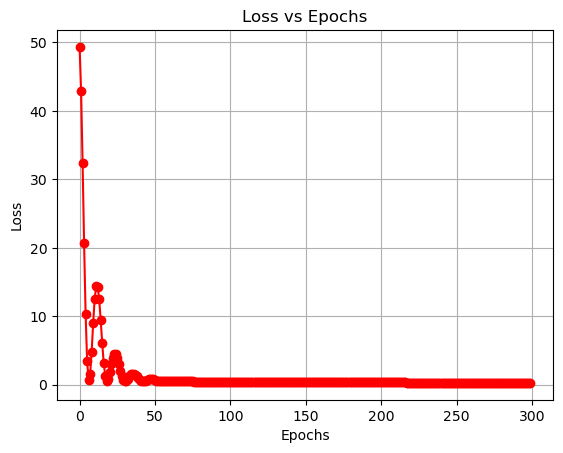

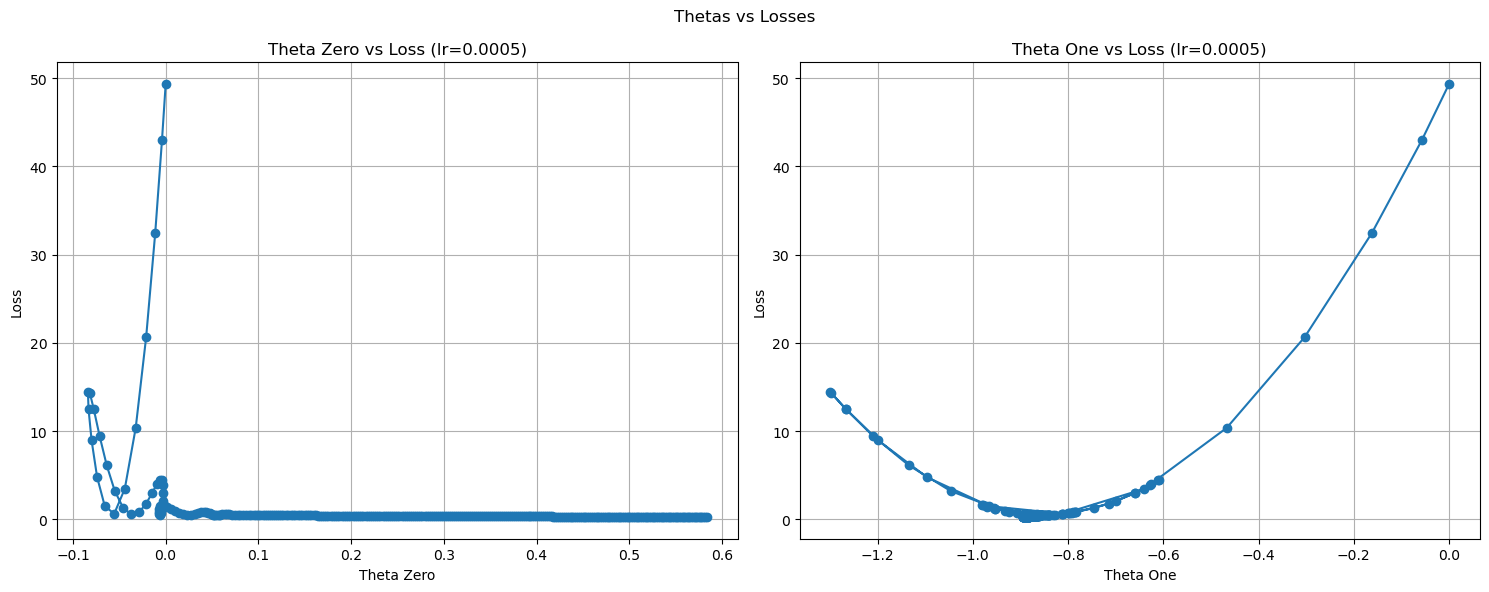

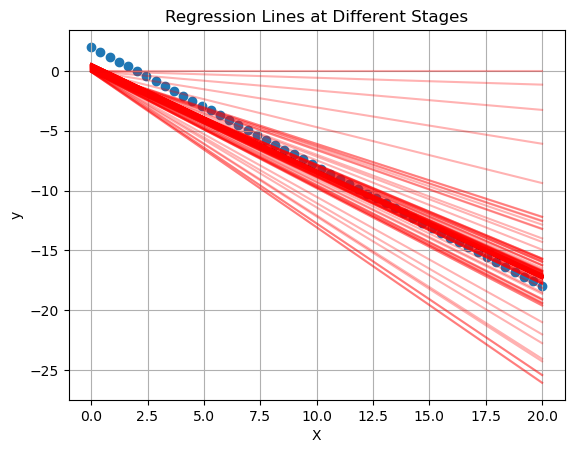

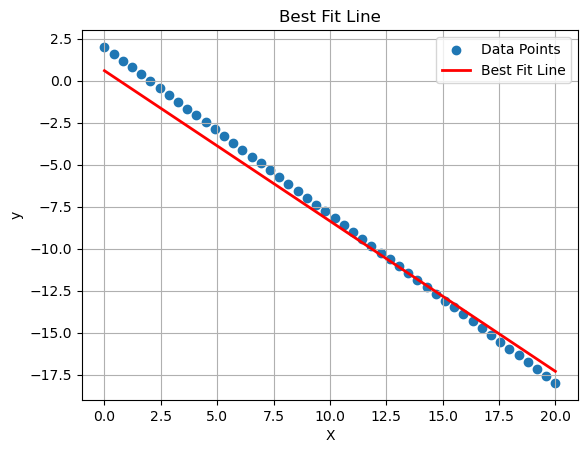

In [17]:
vis(X, y, y_pred, ts0, ts1, j, 0.0005)

##### The following results uses alpha = 0.0005, gamma=0.89 and max. iterations = 300.

In [18]:
t0, t1, ts0, ts1, j = momentum_GD(X, y, 0.0005, 0.89, 300)

========== Iteration 1 ==========
h(x) = 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
error = 
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]
Gradient Norm = 114.97254258164628
Theta 0 New = -0.004
Theta 1 New = -0.05734693877551021
========== Iteration 2 ==========
h(x) = 
[-0.004      -0.02740691 -0.05081383 -0.07422074 -0.0

In [19]:
y_pred = t0 + t1 * X
print(f"r2_score: {r2_score(y, y_pred)}")

r2_score: 0.9840948111189305


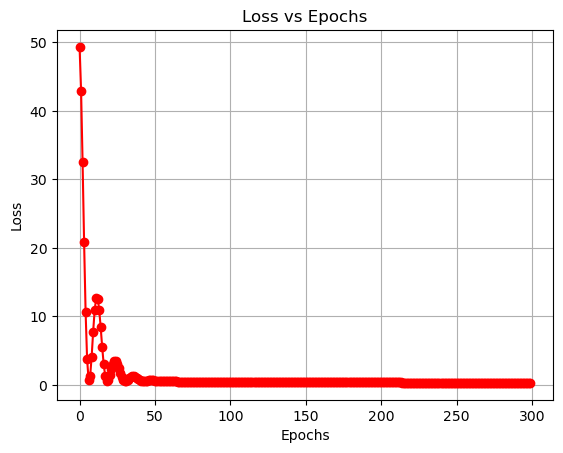

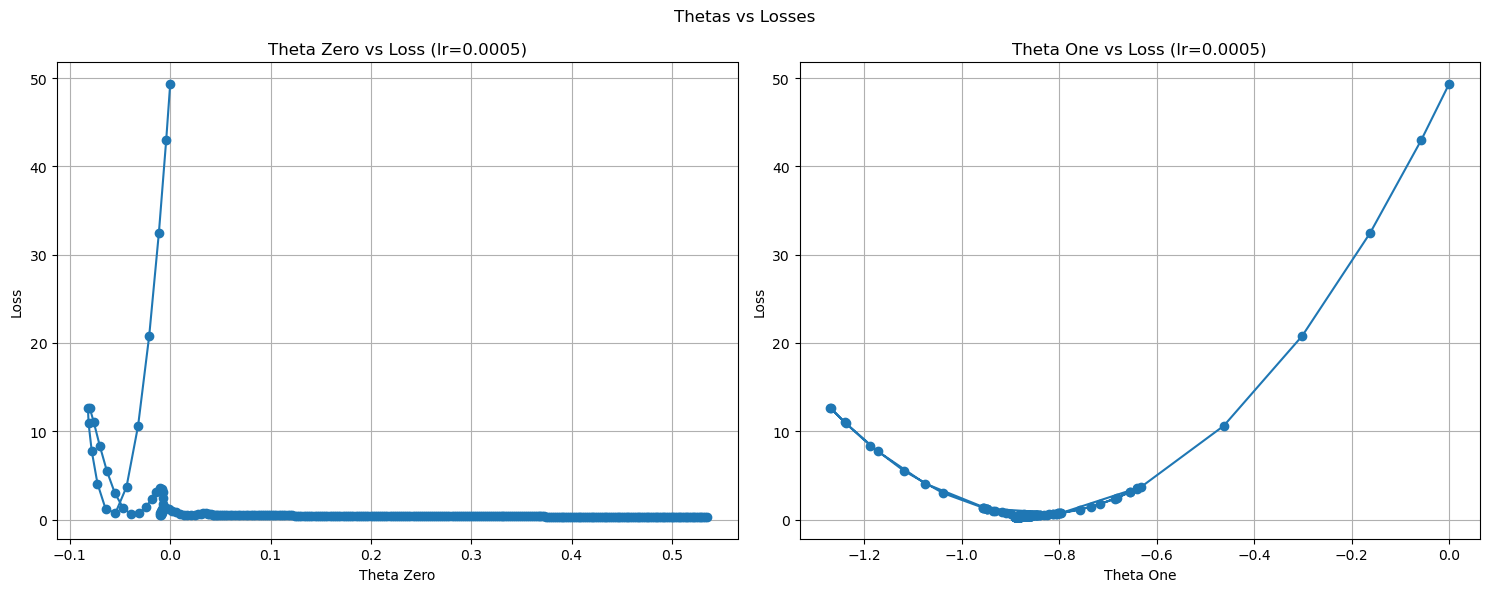

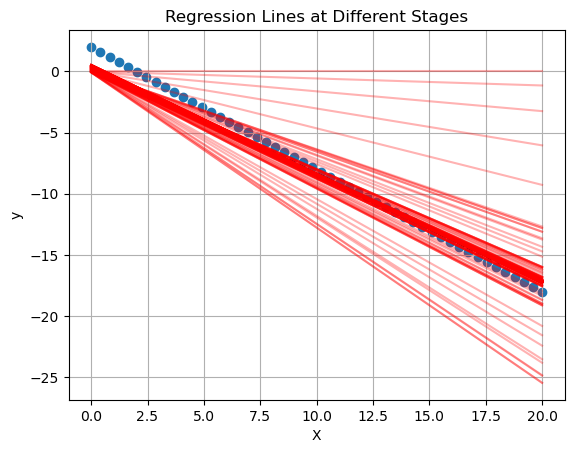

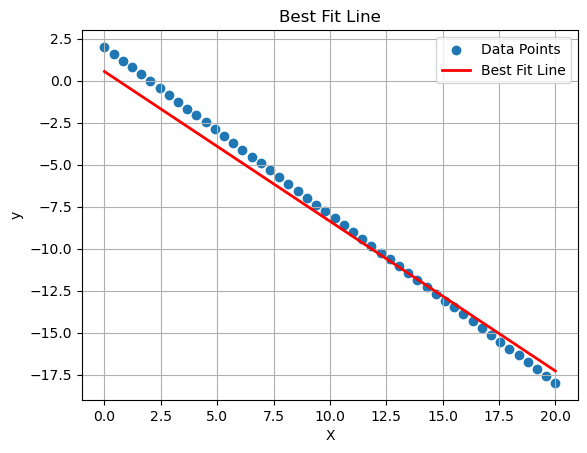

In [20]:
vis(X, y, y_pred, ts0, ts1, j, 0.0005)

### Do not forget:

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

### Update your Batch GD for one variable  implementation to be NAG and check your results

##### Very Important:
- <b><font color='red'> In order to calculate the gradient at theta_temp, you will need to calculate the prediction (hypothesis output) using theta_temp. </font></b> 
##### h_temp = theta0_temp + theta1_temp * X 

In [21]:
def nag_GD(X, y, lr = 0.01, gamma = 0.9, itteration = 300):
    m = len(X)
    theta_0 = 0
    theta_1 = 0    
    losses = []
    all_theta_0 = []
    all_theta_1 = []
    
    m_t_0 = 0
    m_t_1 = 0
    
    for i in range(itteration):
        print("="*10, f"Iteration {i+1}", '='*10)
        all_theta_0.append(theta_0)
        all_theta_1.append(theta_1)
        
        h = theta_0 + theta_1 * X
        print(f"h(x) = \n{h}")
        error_vector = h - y
        print(f"error = \n{error_vector}")
        J = np.sum(error_vector ** 2) / (2 * m)
        losses.append(J)
        
        grad_0 = np.sum(error_vector) / m
        grad_1 = np.sum(error_vector * X) / m
        norm = np.linalg.norm(np.array([grad_0, grad_1]))
        print(f"Gradient Norm = {norm}")
        if norm < 0.001 or ((i > 1) and (abs(losses[-2] - J) < 0.001)):
            print(f"Convergence After {i+1} iteration")
            break
        
        theta_t_0 = theta_0 - gamma * m_t_0
        theta_t_1 = theta_1 - gamma * m_t_1
        print(f"Lookahead Theta 0 = {theta_t_0}")
        print(f"Lookahead Theta 1 = {theta_t_1}")
        h = theta_t_0 + theta_t_1 * X
        d_theta_t_0 = np.sum((h - y)) / m
        d_theta_t_1 = np.sum((h - y) * X) / m
        
        m_t_0 = gamma * m_t_0 + lr * d_theta_t_0
        m_t_1 = gamma * m_t_1 + lr * d_theta_t_1
        
        theta_0 = theta_t_0 - lr * d_theta_t_0
        theta_1 = theta_t_1 - lr * d_theta_t_1
        print(f"Theta 0 New = {theta_0}")
        print(f"Theta 1 New = {theta_1}")
        
    return theta_0, theta_1, all_theta_0, all_theta_1, losses

##### The following results uses alpha = 0.0005, gamma=0.9 and max. iterations = 300.

In [22]:
t0, t1, ts0, ts1, j = nag_GD(X, y, 0.0005, 0.9, 300)

========== Iteration 1 ==========
h(x) = 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
error = 
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]
Gradient Norm = 114.97254258164628
Lookahead Theta 0 = 0.0
Lookahead Theta 1 = 0.0
Theta 0 New = -0.004
Theta 1 New = -0.05734693877551021
========== Iteration 2 ==========
h(x) = 
[-0.0

In [23]:
y_pred = t0 + t1 * X
print(f"r2_score = {r2_score(y, y_pred)}")

r2_score = 0.971103130756324


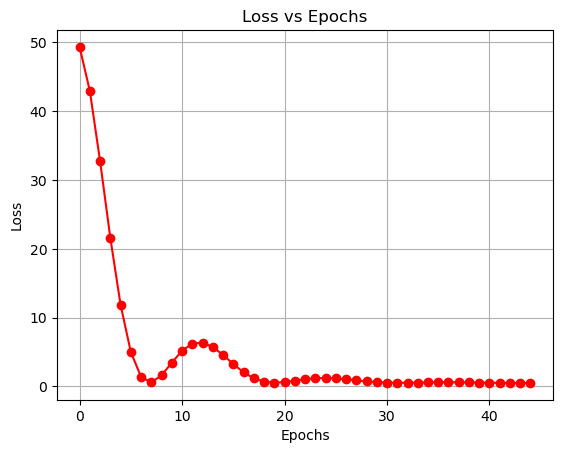

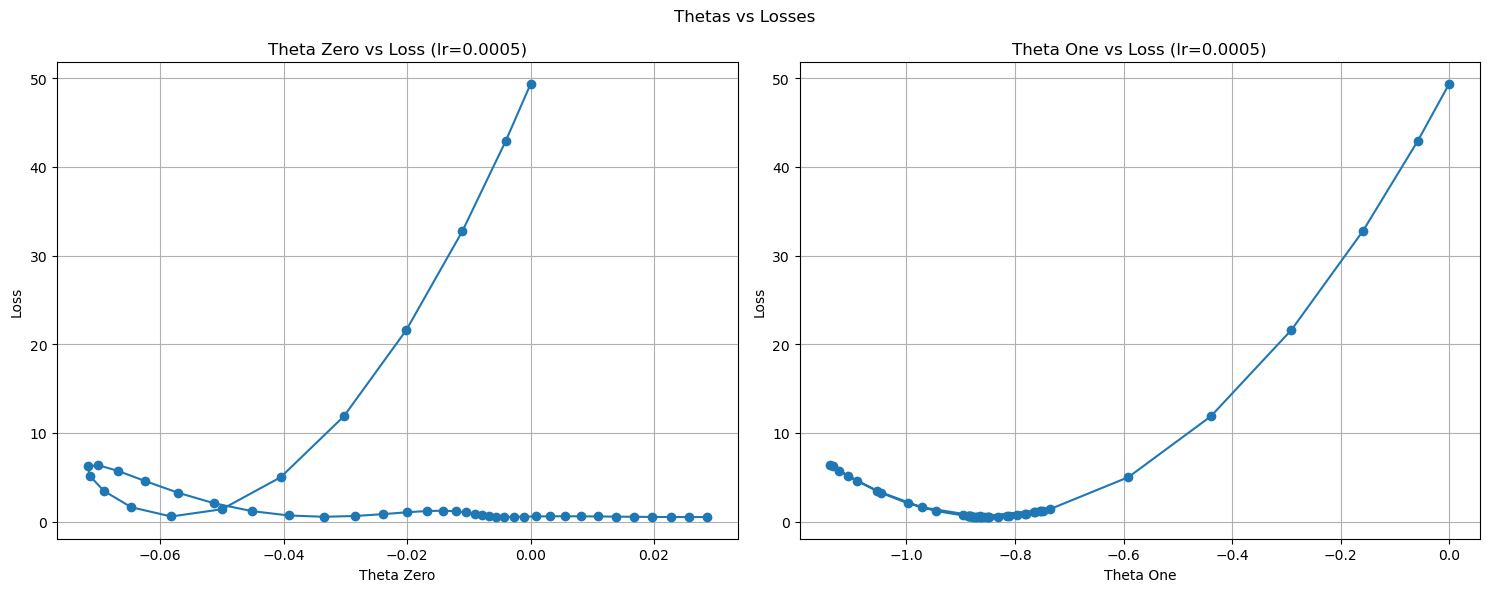

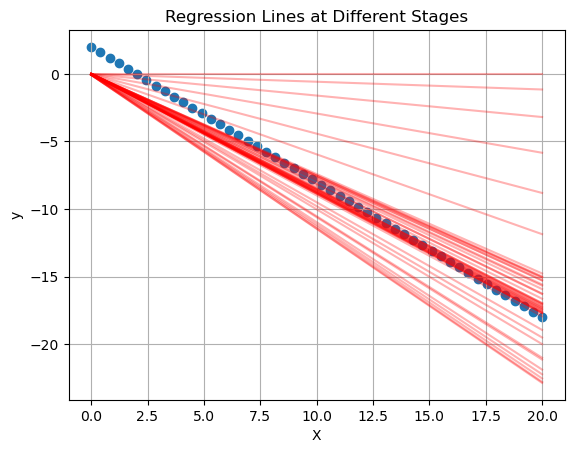

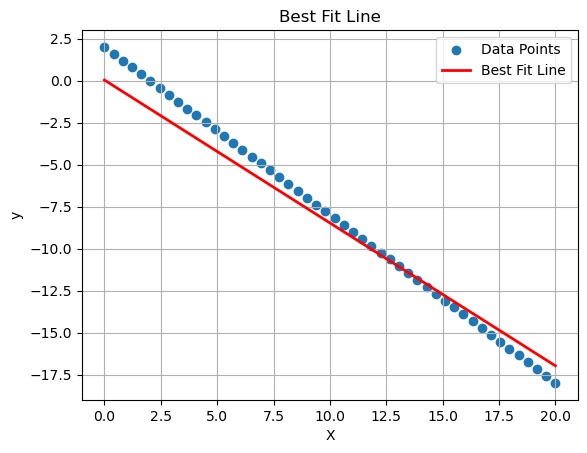

In [24]:
vis(X, y, y_pred, ts0, ts1, j, 0.0005)

##### The following results uses alpha = 0.0005, gamma=0.89 and max. iterations = 300.

In [25]:
t0, t1, ts0, ts1, j = nag_GD(X, y, 0.0005, 0.89, 300)

========== Iteration 1 ==========
h(x) = 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
error = 
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]
Gradient Norm = 114.97254258164628
Lookahead Theta 0 = 0.0
Lookahead Theta 1 = 0.0
Theta 0 New = -0.004
Theta 1 New = -0.05734693877551021
========== Iteration 2 ==========
h(x) = 
[-0.0

In [26]:
y_pred = t0 + t1 * X
print(f"r2_score = {r2_score(y, y_pred)}")

r2_score = 0.9699718983158406


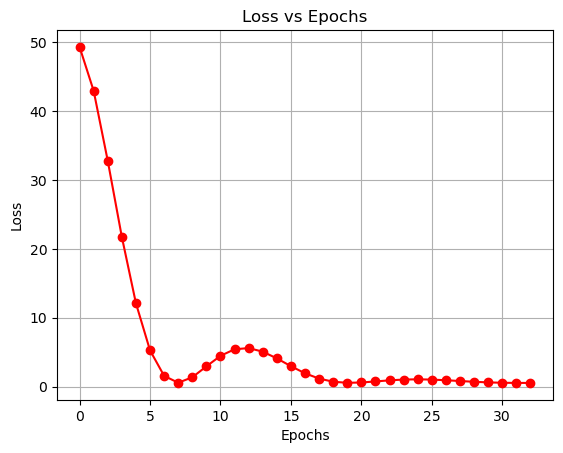

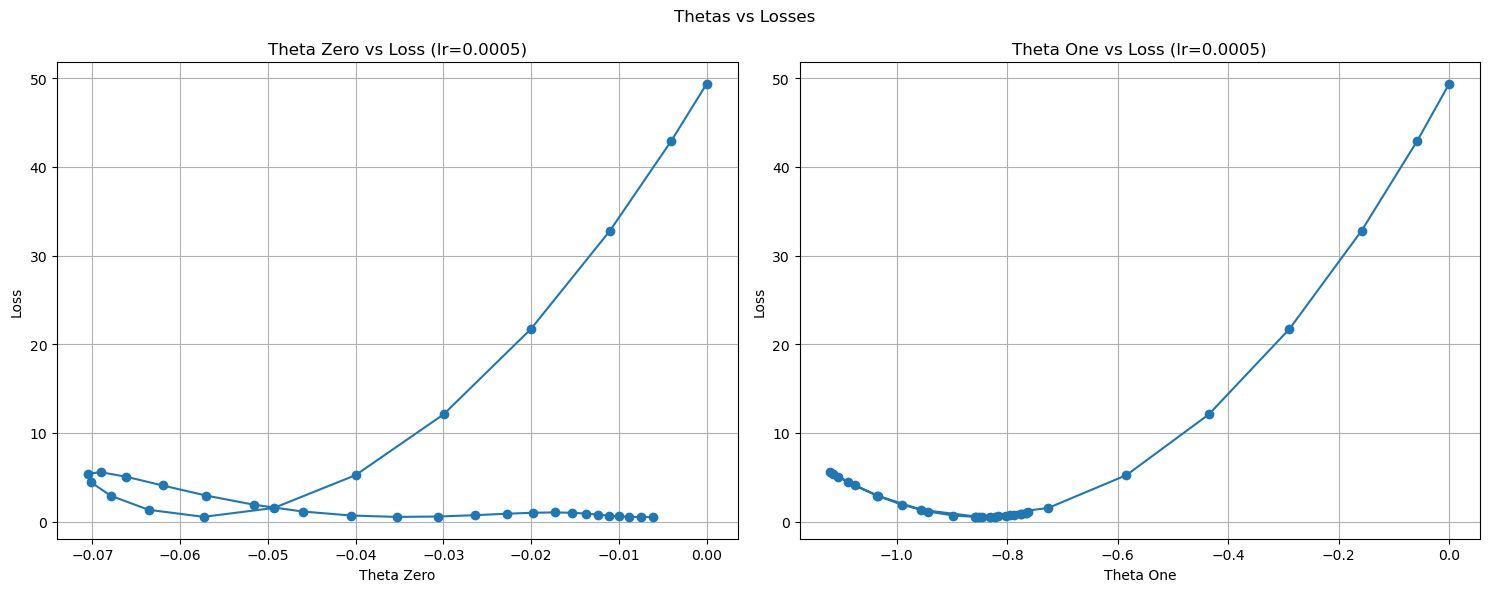

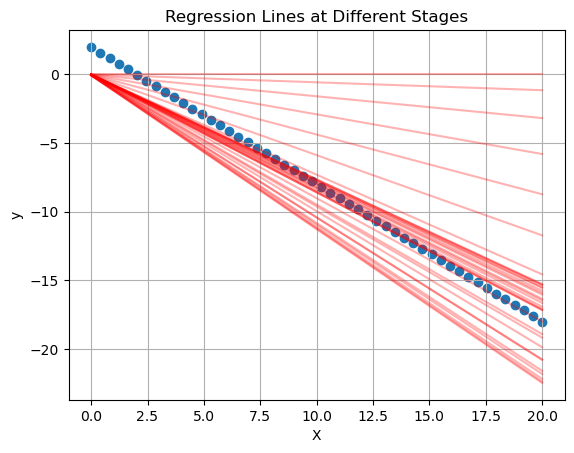

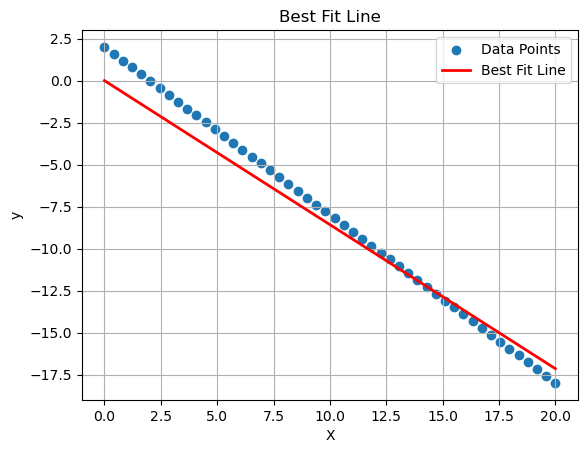

In [27]:
vis(X, y, y_pred, ts0, ts1, j, 0.0005)